#HOUSE PRICE PREDICTION regression Project

#Project Goal

predict the price of house by its features.if you are a buyer or seller of the house but you don't know the exact price of the house this algorithm   will help to predict the price of the house.

#load Modules/Libraries

In [131]:
#install below libraries by following command in anaconda project
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import calendar

#Load Dataset

In [12]:
import pandas as pd




df_train=pd.read_csv('/train.csv')
df_test=pd.read_csv('/test.csv')

print("shape of df_train:",df_train.shape)
print("shape of df_test:",df_test.shape)


shape of df_train: (1460, 81)
shape of df_test: (1459, 80)


In [9]:
df_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [10]:
df_test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


#Data preprocessing

#features

Neighborhood
OverallQual
OverallCond
YearBuilt
Foundation*
Electrical
KitchenQual
GarageType
GarageFinish
Fence

#Data Integration

In [13]:
df=pd.concat([df_train,df_test])
print("shape of integrated Data/DF:",df.shape)

shape of integrated Data/DF: (2919, 81)


In [15]:
df.head(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500.0
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500.0
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500.0
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000.0
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000.0


In [17]:
df.tail(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1454,2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2006,WD,Normal,NaN
1455,2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml,NaN
1456,2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml,NaN
1457,2918,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal,NaN
1458,2919,60,RL,74.0,9627,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,11,2006,WD,Normal,NaN


#Get The Breif Information Of Dataset

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2919 entries, 0 to 1458
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             2919 non-null   int64  
 1   MSSubClass     2919 non-null   int64  
 2   MSZoning       2915 non-null   object 
 3   LotFrontage    2433 non-null   float64
 4   LotArea        2919 non-null   int64  
 5   Street         2919 non-null   object 
 6   Alley          198 non-null    object 
 7   LotShape       2919 non-null   object 
 8   LandContour    2919 non-null   object 
 9   Utilities      2917 non-null   object 
 10  LotConfig      2919 non-null   object 
 11  LandSlope      2919 non-null   object 
 12  Neighborhood   2919 non-null   object 
 13  Condition1     2919 non-null   object 
 14  Condition2     2919 non-null   object 
 15  BldgType       2919 non-null   object 
 16  HouseStyle     2919 non-null   object 
 17  OverallQual    2919 non-null   int64  
 18  OverallCond  

#Most Null Value Features

Alley
FireplaceQu
PoolQc
Fence
MiscFeature

In [20]:
int_Features=df.select_dtypes(include=['int64']).columns
print("total number of Integer features:",int_Features.shape[0])

print("integer features names:",int_Features.tolist())

total number of Integer features: 26
integer features names: ['Id', 'MSSubClass', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold']


In [23]:
float_Features=df.select_dtypes(include=['float64']).columns
print("total number of float features:",float_Features.shape[0])

print("float features names:",float_Features.tolist())

total number of float features: 12
float features names: ['LotFrontage', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'SalePrice']


In [24]:
cat_Features=df.select_dtypes(include=["object"]).columns
print("total number of categorical features:",cat_Features.shape[0])

print("integer categorical names:",cat_Features.tolist())

total number of categorical features: 43
integer categorical names: ['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition']


#Get the Statical Information of Numerical Features

In [25]:
df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,2919.000000,2919.000000,2433.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2896.000000,2918.000000,...,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,1460.000000
mean,1460.000000,57.137718,69.305795,10168.114080,6.089072,5.564577,1971.312778,1984.264474,102.201312,441.423235,...,93.709832,47.486811,23.098321,2.602261,16.062350,2.251799,50.825968,6.213087,2007.792737,180921.195890
std,842.787043,42.517628,23.344905,7886.996359,1.409947,1.113131,30.291442,20.894344,179.334253,455.610826,...,126.526589,67.575493,64.244246,25.188169,56.184365,35.663946,567.402211,2.714762,1.314964,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,730.500000,20.000000,59.000000,7478.000000,5.000000,5.000000,1953.500000,1965.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000,129975.000000
50%,1460.000000,50.000000,68.000000,9453.000000,6.000000,5.000000,1973.000000,1993.000000,0.000000,368.500000,...,0.000000,26.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,2189.500000,70.000000,80.000000,11570.000000,7.000000,6.000000,2001.000000,2004.000000,164.000000,733.000000,...,168.000000,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,2919.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,1424.000000,742.000000,1012.000000,508.000000,576.000000,800.000000,17000.000000,12.000000,2010.000000,755000.000000


In [26]:
df.describe().shape

(8, 38)

#Handling Missing Values

visuallize null/missing values

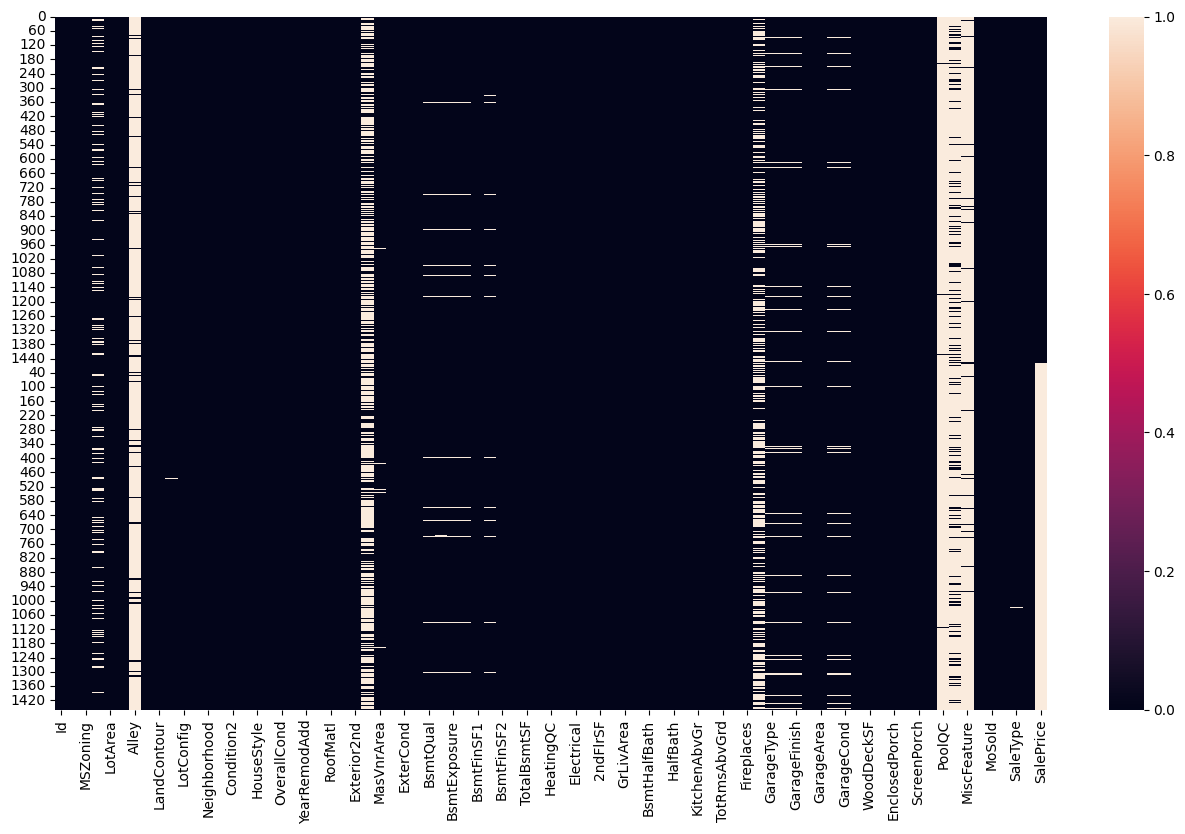

In [28]:
plt.figure(figsize=(16,9))
sns.heatmap(df.isnull())
plt.savefig("heatmap_DF_of_null_Values.png")

#Get The null value percentage for every feature

In [29]:
null_percentage=df.isnull().sum()
null_percentage

,0
Id,0
MSSubClass,0
MSZoning,4
LotFrontage,486
LotArea,0
...,...
MoSold,0
YrSold,0
SaleType,1
SaleCondition,0


In [30]:
null_percentage=df.isnull().sum()/df.shape[0]*100
null_percentage

,0
Id,0.000000
MSSubClass,0.000000
MSZoning,0.137033
LotFrontage,16.649538
LotArea,0.000000
...,...
MoSold,0.000000
YrSold,0.000000
SaleType,0.034258
SaleCondition,0.000000


#Drop columns features

In [31]:
miss_value_50_perc=null_percentage[null_percentage>50]
miss_value_50_perc

,0
Alley,93.216855
MasVnrType,60.500171
PoolQC,99.657417
Fence,80.438506
MiscFeature,96.402878


In [32]:
df["Alley"].value_counts()

,count
Alley,
Grvl,120
Pave,78


In [33]:
miss_value_20_50_perc=null_percentage[(null_percentage>20)&(null_percentage<51)]
miss_value_20_50_perc

,0
FireplaceQu,48.646797
SalePrice,49.982871


In [34]:
miss_value_5_20_perc=null_percentage[(null_percentage>5)&(null_percentage<21)]
miss_value_5_20_perc

,0
LotFrontage,16.649538
GarageType,5.378554
GarageYrBlt,5.447071
GarageFinish,5.447071
GarageQual,5.447071
GarageCond,5.447071


In [35]:
df["LotFrontage"].value_counts().head()

,count
LotFrontage,
60.0,276
80.0,137
70.0,133
50.0,117
75.0,105


<Axes: >

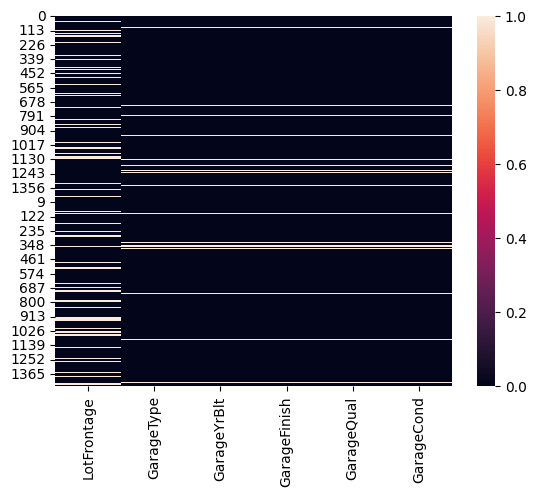

In [36]:
sns.heatmap(df[miss_value_5_20_perc.keys()].isnull())

#Missing Value imputation

In [37]:
missing_value_feat=null_percentage[null_percentage>0]
print("total missing values features:",len(missing_value_feat))

total missing values features: 35


In [38]:
missing_value_feat

,0
MSZoning,0.137033
LotFrontage,16.649538
Alley,93.216855
Utilities,0.068517
Exterior1st,0.034258
Exterior2nd,0.034258
MasVnrType,60.500171
MasVnrArea,0.787941
BsmtQual,2.774923
BsmtCond,2.809181


In [ ]:
BsmtQual
BsmtCond
BsmtExposure
BsmtFinType1
BsmtFinType2

BsmtFinSF1
BsmtFinSF2
BsmtUnfSF
TotalBsmtSF
BsmtFullBath
BsmtHalfBath

In [40]:
cat_na_feat=missing_value_feat[missing_value_feat.keys().isin(cat_Features)]
print("total number of catagorical missing features=",len(cat_na_feat))

total number of catagorical features= 23


In [41]:
int_na_feat=missing_value_feat[missing_value_feat.keys().isin(int_Features)]
print("total number of integer missing features=",len(int_na_feat))

total number of integer missing features= 0


In [42]:
float_na_feat=missing_value_feat[missing_value_feat.keys().isin(float_Features)]
print("total number of float missing features=",len(float_na_feat))

total number of float missing features= 12


## Handling MSZoning

In [14]:
df["MSZoning"].value_counts()

,count
MSZoning,
RL,2265
RM,460
FV,139
RH,26
C (all),25


<Axes: xlabel='count', ylabel='MSZoning'>

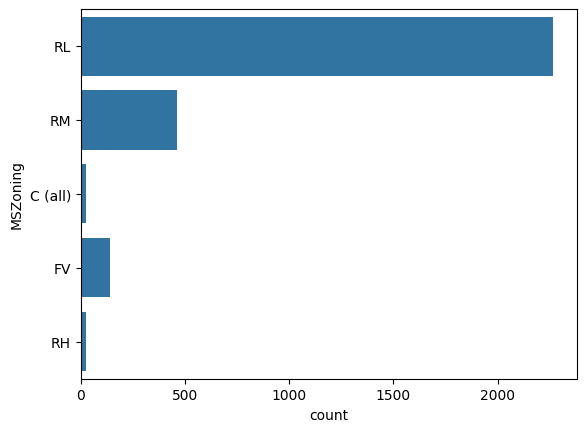

In [44]:
sns.countplot(df["MSZoning"])

In [15]:
df_mvi=df.copy()
df_mvi.shape

(2919, 81)

In [47]:
mszoning_mode=df["MSZoning"].mode()[0]
df_mvi["MSZoning"].replace(np.nan,mszoning_mode,inplace=True)
df_mvi["MSZoning"].isnull().sum()

<ipython-input-47-1de13b623590>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_mvi["MSZoning"].replace(np.nan,mszoning_mode,inplace=True)


0

In [52]:
def oldNewCountPlot(df,df_new,feature):
  plt.subplot(121)
  sns.countplot(df["MSZoning"])
  plt.title("old Data Distribution")
  plt.subplot(122)
  sns.countplot(df_new["MSZoning"])
  plt.title("new Data Distribution")

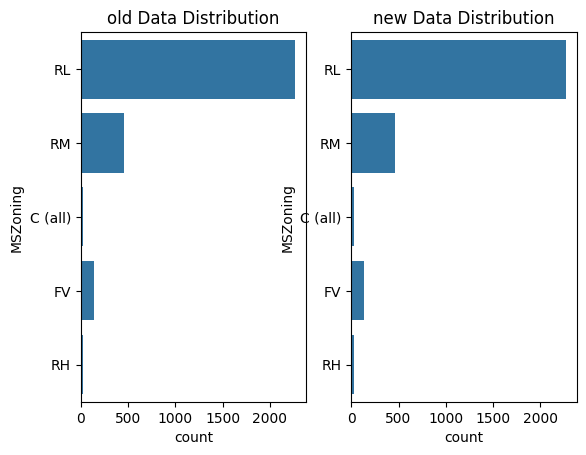

In [54]:
oldNewCountPlot(df,df_mvi,"MSZoning")

<Axes: xlabel='count', ylabel='MSZoning'>

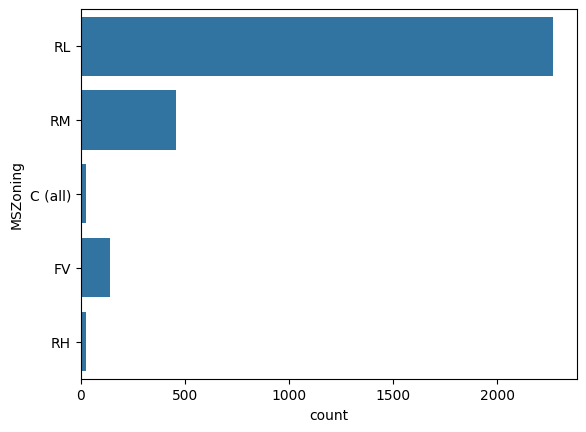

In [48]:
sns.countplot(df_mvi["MSZoning"])

#Handling Alley

In [55]:
df_mvi["Alley"].value_counts()

,count
Alley,
Grvl,120
Pave,78


In [56]:
alley_count="NA"
df_mvi["Alley"].replace(np.nan,alley_count,inplace=True)
df_mvi["Alley"].isnull().sum()

<ipython-input-56-26f6188c4102>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_mvi["Alley"].replace(np.nan,alley_count,inplace=True)


0

In [58]:
def oldNewCountPlot(df,df_new,feature):
  plt.subplot(121)
  sns.countplot(df[feature])
  plt.title("old Data Distribution")
  plt.subplot(122)
  sns.countplot(df_new[feature])
  plt.title("new Data Distribution")

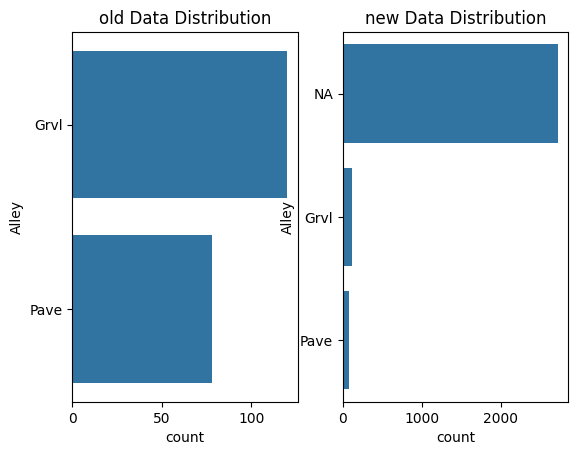

In [60]:
oldNewCountPlot(df,df_mvi,"Alley")

# Handling LotFrontage

In [66]:
def boxHistPlot(df,figsize=(16,5)):
  plt.figure(figsize=figsize)
  plt.subplot(121)
  sns.boxplot(df)
  plt.subplot(122)
  sns.distplot(df)

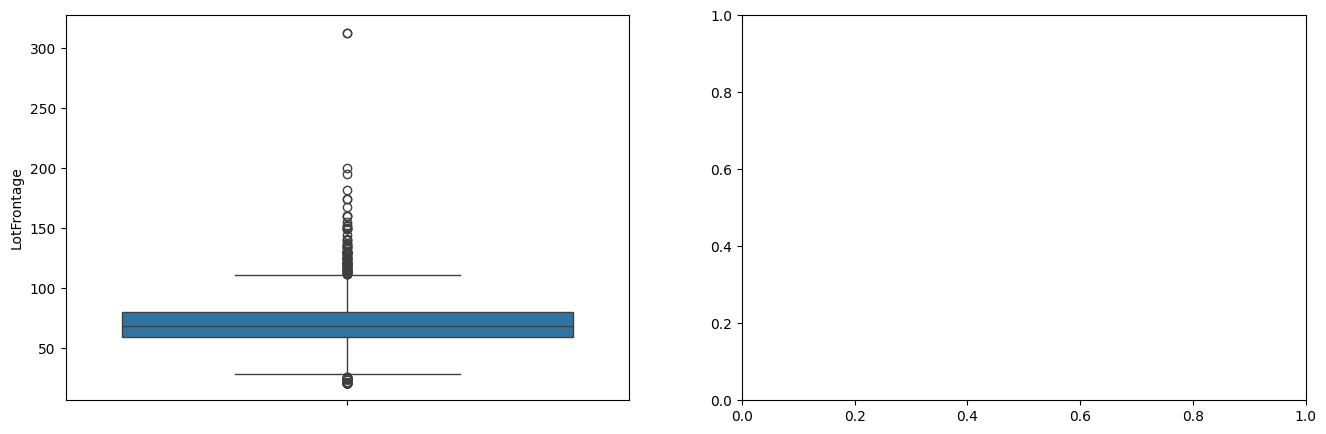

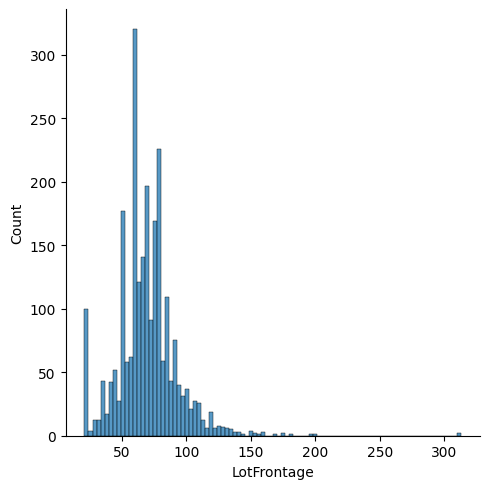

In [67]:
boxHistPlot(df["LotFrontage"])

In [69]:
lotlrontage_mean=df["LotFrontage"].mean()
lotlrontage_mean
df_mvi["LotFrontage"].replace(np.nan,lotlrontage_mean,inplace=True)
df_mvi["LotFrontage"].isnull().sum()

<ipython-input-69-389f8d6c3a15>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_mvi["LotFrontage"].replace(np.nan,lotlrontage_mean,inplace=True)


0

In [70]:
def oldNewBoxHistPlot(df,df_new,feature,figsize=(16,5)):
  plt.figure(figsize=figsize)
  plt.subplot(221)
  sns.boxplot(df[feature])
  plt.title("old Data Distribution")
  plt.subplot(222)
  sns.distplot(df[feature])
  plt.title("new Data Distribution")
  plt.subplot(223)
  sns.boxplot(df_new[feature])
  plt.title("new Data Distribution")
  plt.subplot(224)
  sns.distplot(df[feature])
  plt.title("new Data Distribution")

<ipython-input-70-5a16fb8d710c>:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[feature])
<ipython-input-70-5a16fb8d710c>:13: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[feature])


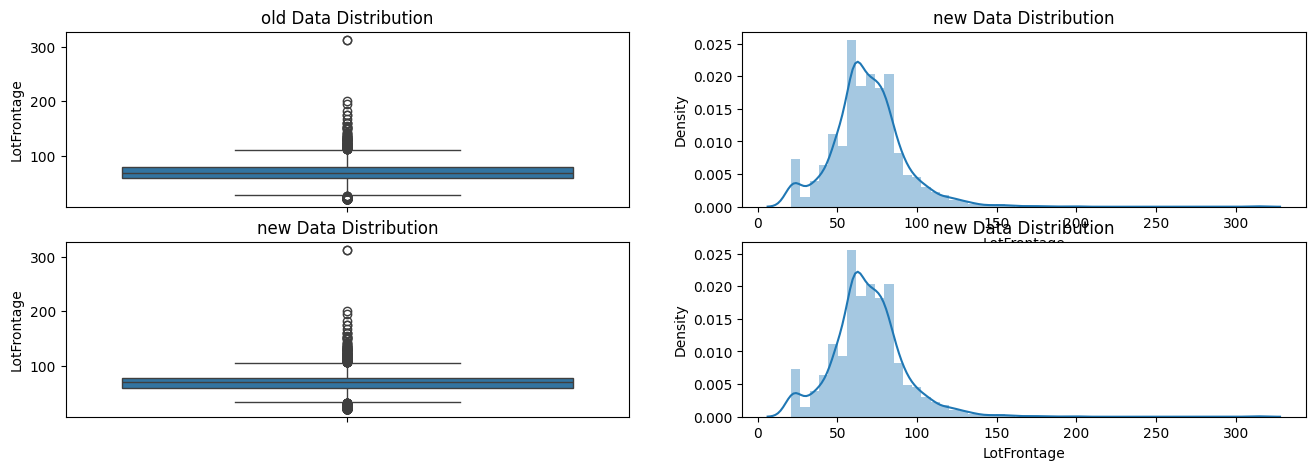

In [71]:
oldNewBoxHistPlot(df,df_mvi,"LotFrontage")

#handling utilites

In [72]:
df["Utilities"].value_counts()

,count
Utilities,
AllPub,2916
NoSeWa,1


In [73]:
utilities_mode=df["Utilities"].mode()[0]
df_mvi["Utilities"].replace(np.nan,utilities_mode,inplace=True)
df_mvi["Utilities"].isnull().sum()

<ipython-input-73-f6e7214cbd95>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_mvi["Utilities"].replace(np.nan,utilities_mode,inplace=True)


0

#handling exterior1 & exterior2

In [75]:
df["Exterior1st"].value_counts()

,count
Exterior1st,
VinylSd,1025
MetalSd,450
HdBoard,442
Wd Sdng,411
Plywood,221
CemntBd,126
BrkFace,87
WdShing,56
AsbShng,44


In [76]:
df["Exterior2nd"].value_counts()

,count
Exterior2nd,
VinylSd,1014
MetalSd,447
HdBoard,406
Wd Sdng,391
Plywood,270
CmentBd,126
Wd Shng,81
BrkFace,47
Stucco,47


In [77]:
utilities_mode=df["Exterior1st"].mode()[0]
df_mvi["Exterior1st"].replace(np.nan,utilities_mode,inplace=True)
df_mvi["Exterior1st"].isnull().sum()

<ipython-input-77-0b9a8bd61758>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_mvi["Exterior1st"].replace(np.nan,utilities_mode,inplace=True)


0

In [78]:
utilities_mode=df["Exterior2nd"].mode()[0]
df_mvi["Exterior2nd"].replace(np.nan,utilities_mode,inplace=True)
df_mvi["Exterior2nd"].isnull().sum()

<ipython-input-78-9c4c88e048de>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_mvi["Exterior2nd"].replace(np.nan,utilities_mode,inplace=True)


0

#Handling MasVnrType

<Axes: >

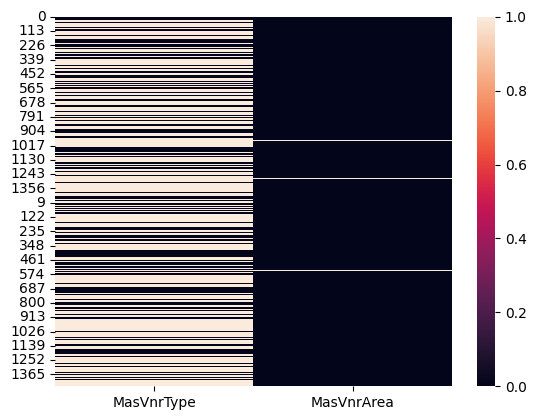

In [81]:
sns.heatmap(df[["MasVnrType","MasVnrArea"]].isnull())

In [82]:
df[df[["MasVnrType","MasVnrArea"]].isnull().any(axis=1)]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500.0
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000.0
5,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000.0
8,9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900.0
9,10,190,RL,50.0,7420,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,1,2008,WD,Normal,118000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1453,2914,160,RM,21.0,1526,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,NaN,0,6,2006,WD,Normal,NaN
1454,2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2006,WD,Normal,NaN
1455,2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml,NaN
1456,2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml,NaN


In [83]:
df["MasVnrType"].value_counts()

,count
MasVnrType,
BrkFace,879
Stone,249
BrkCmn,25


In [84]:
utilities_mode=df["MasVnrType"].mode()[0]
df_mvi["MasVnrType"].replace(np.nan,utilities_mode,inplace=True)
df_mvi["MasVnrType"].isnull().sum()

<ipython-input-84-867c5ff2fb52>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_mvi["MasVnrType"].replace(np.nan,utilities_mode,inplace=True)


0

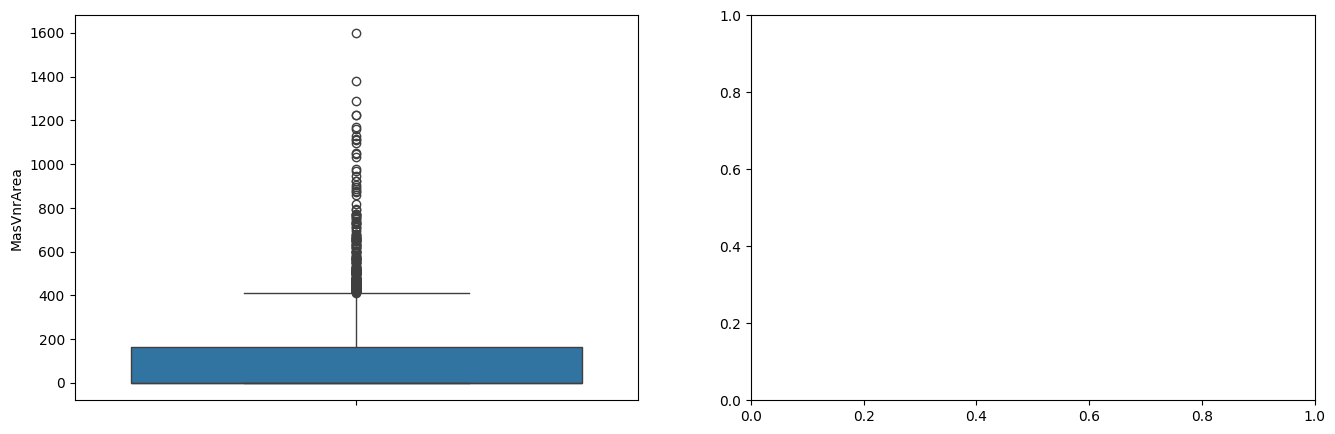

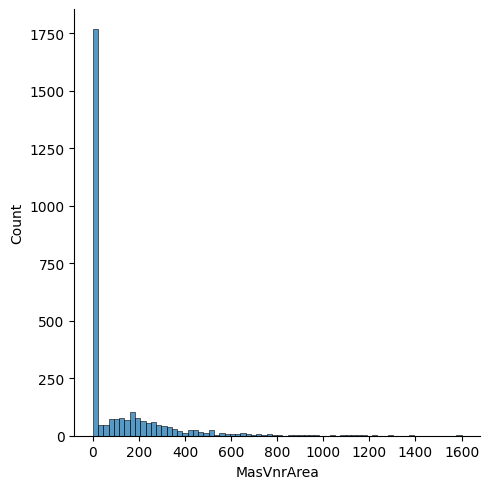

In [85]:
boxHistPlot(df["MasVnrArea"])

In [87]:
MasVnrArea_count=0
df_mvi["MasVnrArea"].replace(np.nan,MasVnrArea_count,inplace=True)
df_mvi["MasVnrArea"].isnull().sum()

0

In [93]:
cat_bsmt_feat=["BsmtQual",
"BsmtQual",
"BsmtCond",
"BsmtExposure",
"BsmtFinType1",
"BsmtFinType2"]

num_bsmt_feat=[
"BsmtFinSF1",
"BsmtFinSF2",
"BsmtUnfSF"	,
"TotalBsmtSF",
"BsmtFullBath",
"BsmtHalfBath"]

<Axes: >

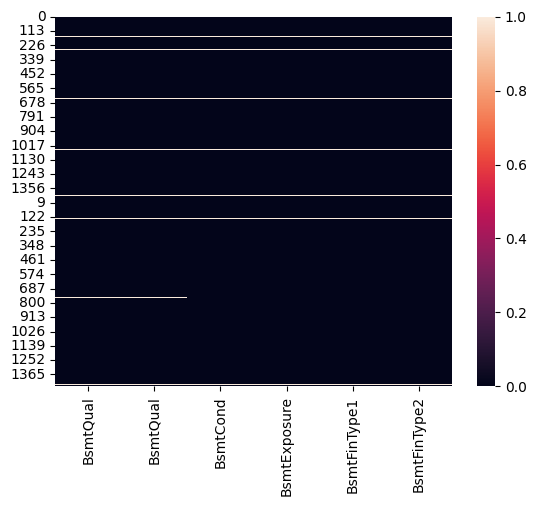

In [94]:
sns.heatmap(df[cat_bsmt_feat].isnull())

In [95]:
for feat in cat_bsmt_feat:
  print(f"value count of {feat}:{df[feat].value_counts()}")

value count of BsmtQual:BsmtQual
TA    1283
Gd    1209
Ex     258
Fa      88
Name: count, dtype: int64
value count of BsmtQual:BsmtQual
TA    1283
Gd    1209
Ex     258
Fa      88
Name: count, dtype: int64
value count of BsmtCond:BsmtCond
TA    2606
Gd     122
Fa     104
Po       5
Name: count, dtype: int64
value count of BsmtExposure:BsmtExposure
No    1904
Av     418
Gd     276
Mn     239
Name: count, dtype: int64
value count of BsmtFinType1:BsmtFinType1
Unf    851
GLQ    849
ALQ    429
Rec    288
BLQ    269
LwQ    154
Name: count, dtype: int64
value count of BsmtFinType2:BsmtFinType2
Unf    2493
Rec     105
LwQ      87
BLQ      68
ALQ      52
GLQ      34
Name: count, dtype: int64


In [96]:
bsmt_cont="NA"
for feat in cat_bsmt_feat:
  df_mvi[feat].replace(np.nan,bsmt_cont,inplace=True)

<ipython-input-96-2842e02130f7>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_mvi[feat].replace(np.nan,bsmt_cont,inplace=True)


In [97]:
df_mvi[cat_bsmt_feat].isnull().sum()

,0
BsmtQual,0
BsmtQual,0
BsmtCond,0
BsmtExposure,0
BsmtFinType1,0
BsmtFinType2,0


<Axes: >

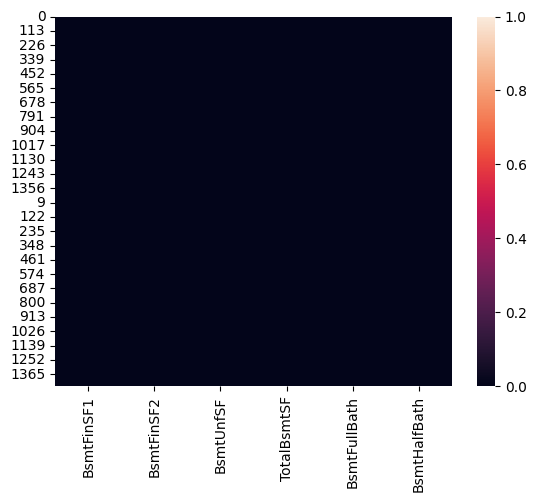

In [98]:
sns.heatmap(df[num_bsmt_feat].isnull())

In [99]:
bsmt_cont=0
for feat in num_bsmt_feat:
  df_mvi[feat].replace(np.nan,bsmt_cont,inplace=True)

<ipython-input-99-b9f59847e477>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_mvi[feat].replace(np.nan,bsmt_cont,inplace=True)


In [100]:
df_mvi[num_bsmt_feat].isnull().sum()

,0
BsmtFinSF1,0
BsmtFinSF2,0
BsmtUnfSF,0
TotalBsmtSF,0
BsmtFullBath,0
BsmtHalfBath,0


In [101]:
df_ekk=df[["Electrical","KitchenQual","KitchenAbvGr"]]
df_ekk[df_ekk.isnull().any(axis=1)]

,Electrical,KitchenQual,KitchenAbvGr
1379,NaN,Gd,1
95,SBrkr,NaN,1


In [102]:
electrical_mode=df["Electrical"].mode()[0]
df_mvi["Electrical"].replace(np.nan,utilities_mode,inplace=True)
df_mvi["Electrical"].isnull().sum()

<ipython-input-102-d36da0010709>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_mvi["Electrical"].replace(np.nan,utilities_mode,inplace=True)


0

In [103]:
electrical_mode=df["KitchenQual"].mode()[0]
df_mvi["KitchenQual"].replace(np.nan,utilities_mode,inplace=True)
df_mvi["KitchenQual"].isnull().sum()

<ipython-input-103-7d90645228bd>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_mvi["KitchenQual"].replace(np.nan,utilities_mode,inplace=True)


0

In [ ]:
Functional
FireplaceQu
GarageType
GarageYrBlt
GarageFinish
GarageCars
GarageArea
GarageQual
GarageCond
PoolQC
Fence
MiscFeature
SaleType

In [104]:
electrical_mode=df["Functional"].mode()[0]
df_mvi["Functional"].replace(np.nan,utilities_mode,inplace=True)
df_mvi["Functional"].isnull().sum()

<ipython-input-104-b7e3cc2b76c0>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_mvi["Functional"].replace(np.nan,utilities_mode,inplace=True)


0

In [105]:
electrical_mode=df["SaleType"].mode()[0]
df_mvi["SaleType"].replace(np.nan,utilities_mode,inplace=True)
df_mvi["SaleType"].isnull().sum()

<ipython-input-105-9dcbe0380225>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_mvi["SaleType"].replace(np.nan,utilities_mode,inplace=True)


0

In [106]:
other_cat_feat=["FireplaceQu",
"PoolQC",
"Fence",
"MiscFeature"]
for feat in other_cat_feat:
  print(f"value count of {feat}:{df[feat].value_counts()}")

value count of FireplaceQu:FireplaceQu
Gd    744
TA    592
Fa     74
Po     46
Ex     43
Name: count, dtype: int64
value count of PoolQC:PoolQC
Ex    4
Gd    4
Fa    2
Name: count, dtype: int64
value count of Fence:Fence
MnPrv    329
GdPrv    118
GdWo     112
MnWw      12
Name: count, dtype: int64
value count of MiscFeature:MiscFeature
Shed    95
Gar2     5
Othr     4
TenC     1
Name: count, dtype: int64


In [107]:
fire_cont="NA"
df_mvi["FireplaceQu"].replace(np.nan,utilities_mode,inplace=True)
df_mvi["FireplaceQu"].isnull().sum()

<ipython-input-107-e27d6e40e265>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_mvi["FireplaceQu"].replace(np.nan,utilities_mode,inplace=True)


0

In [108]:
fire_cont="NA"
df_mvi["PoolQC"].replace(np.nan,utilities_mode,inplace=True)
df_mvi["PoolQC"].isnull().sum()

<ipython-input-108-d77ec07547b9>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_mvi["PoolQC"].replace(np.nan,utilities_mode,inplace=True)


0

In [109]:
fire_cont="NA"
df_mvi["Fence"].replace(np.nan,utilities_mode,inplace=True)
df_mvi["Fence"].isnull().sum()

<ipython-input-109-d8f953c51fff>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_mvi["Fence"].replace(np.nan,utilities_mode,inplace=True)


0

In [113]:
fire_cont="NA"
df_mvi["MiscFeature"].replace(np.nan,utilities_mode,inplace=True)
df_mvi["MiscFeature"].isnull().sum()

<ipython-input-113-b7fd460db710>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_mvi["MiscFeature"].replace(np.nan,utilities_mode,inplace=True)


0

In [ ]:
GarageType
GarageYrBlt
GarageFinish
GarageCars
GarageArea
GarageQual
GarageCond

In [117]:
num_feat=["GarageArea","GarageFinish" ,"GarageCond" ,"GarageQual"]
cat_feat=["GarageYrBlt","GarageCars","GarageArea"]
df_garafe=df[num_feat+cat_feat]
df_garafe[df_garafe.isnull().any(axis=1)]

,GarageArea,GarageFinish,GarageCond,GarageQual,GarageYrBlt,GarageCars,GarageArea
39,0.0,NaN,NaN,NaN,NaN,0.0,0.0
48,0.0,NaN,NaN,NaN,NaN,0.0,0.0
78,0.0,NaN,NaN,NaN,NaN,0.0,0.0
88,0.0,NaN,NaN,NaN,NaN,0.0,0.0
89,0.0,NaN,NaN,NaN,NaN,0.0,0.0
...,...,...,...,...,...,...,...
1433,0.0,NaN,NaN,NaN,NaN,0.0,0.0
1449,0.0,NaN,NaN,NaN,NaN,0.0,0.0
1453,0.0,NaN,NaN,NaN,NaN,0.0,0.0
1454,0.0,NaN,NaN,NaN,NaN,0.0,0.0


In [120]:
fire_cont="NA"
for feat in cat_feat:
  df_mvi[feat].replace(np.nan,utilities_mode,inplace=True)
df_mvi[cat_feat].isnull().sum()

<ipython-input-120-39a4f35c2121>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_mvi[feat].replace(np.nan,utilities_mode,inplace=True)


,0
GarageYrBlt,0
GarageCars,0
GarageArea,0


In [121]:
fire_cont="NA"
for feat in num_feat:
  df_mvi[feat].replace(np.nan,utilities_mode,inplace=True)
df_mvi[num_feat].isnull().sum()

<ipython-input-121-8a65224ad545>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_mvi[feat].replace(np.nan,utilities_mode,inplace=True)


,0
GarageArea,0
GarageFinish,0
GarageCond,0
GarageQual,0


In [122]:
df_mvi.isnull().any(axis=1).sum()

1540

#feature transformation

In [127]:
for_num_conv=["MSSubClass","YearBuilt","YearRemodAdd","GarageYrBlt","MoSold","YrSold"]
for feat in for_num_conv:
  print(f"{feat}:data type={df_mvi[feat].dtype}")

MSSubClass:data type=int64
YearBuilt:data type=int64
YearRemodAdd:data type=int64
GarageYrBlt:data type=object
MoSold:data type=int64
YrSold:data type=int64


In [132]:
df_mvi["MoSold"]=df_mvi["MoSold"].apply(lambda x: calendar.month_abbr[x])

In [134]:
for feat in for_num_conv:
  df_mvi[feat]=df_mvi[feat].astype(str)

In [135]:
for feat in for_num_conv:
  print(f"{feat}:data type={df_mvi[feat].dtype}")

MSSubClass:data type=object
YearBuilt:data type=object
YearRemodAdd:data type=object
GarageYrBlt:data type=object
MoSold:data type=object
YrSold:data type=object


In [137]:
  from pandas.api.types import CategoricalDtype

# Corrected transformation of columns to categorical types
df_mvi['ExterCond'] = df_mvi['ExterCond'].astype(
    CategoricalDtype(categories=['Po', 'Fa', 'TA', 'Gd', 'Ex'], ordered=True)
).cat.codes

df_mvi['BsmtQual'] = df_mvi['BsmtQual'].astype(
    CategoricalDtype(categories=['NA', 'Po', 'Fa', 'TA', 'Gd', 'Ex'], ordered=True)
).cat.codes

df_mvi['BsmtCond'] = df_mvi['BsmtCond'].astype(
    CategoricalDtype(categories=['NA', 'Po', 'Fa', 'TA', 'Gd', 'Ex'], ordered=True)
).cat.codes

df_mvi['BsmtFinType1'] = df_mvi['BsmtFinType1'].astype(
    CategoricalDtype(categories=['NA', 'Unf', 'LwQ', 'Rec', 'BLQ', 'ALQ', 'GLQ'], ordered=True)
).cat.codes

df_mvi['BsmtFinType2'] = df_mvi['BsmtFinType2'].astype(
    CategoricalDtype(categories=['NA', 'Unf', 'LwQ', 'Rec', 'BLQ', 'ALQ', 'GLQ'], ordered=True)
).cat.codes

df_mvi['HeatingQC'] = df_mvi['HeatingQC'].astype(
    CategoricalDtype(categories=['Po', 'Fa', 'TA', 'Gd', 'Ex'], ordered=True)
).cat.codes

df_mvi['KitchenQual'] = df_mvi['KitchenQual'].astype(
    CategoricalDtype(categories=['Po', 'Fa', 'TA', 'Gd', 'Ex'], ordered=True)
).cat.codes

df_mvi['FireplaceQu'] = df_mvi['FireplaceQu'].astype(
    CategoricalDtype(categories=['NA', 'Po', 'Fa', 'TA', 'Gd', 'Ex'], ordered=True)
).cat.codes

df_mvi['GarageQual'] = df_mvi['GarageQual'].astype(
    CategoricalDtype(categories=['NA', 'Po', 'Fa', 'TA', 'Gd', 'Ex'], ordered=True)
).cat.codes

df_mvi['GarageCond'] = df_mvi['GarageCond'].astype(
    CategoricalDtype(categories=['NA', 'Po', 'Fa', 'TA', 'Gd', 'Ex'], ordered=True)
).cat.codes

df_mvi['PoolQC'] = df_mvi['PoolQC'].astype(
    CategoricalDtype(categories=['NA', 'Fa', 'TA', 'Gd', 'Ex'], ordered=True)
).cat.codes

df_mvi['Functional'] = df_mvi['Functional'].astype(
    CategoricalDtype(categories=['Sal', 'Sev', 'Maj2', 'Maj1', 'Mod', 'Min2', 'Min1', 'Typ'], ordered=True)
).cat.codes

df_mvi['GarageFinish'] = df_mvi['GarageFinish'].astype(
    CategoricalDtype(categories=['NA', 'Unf', 'RFn', 'Fin'], ordered=True)
).cat.codes

df_mvi['PavedDrive'] = df_mvi['PavedDrive'].astype(
    CategoricalDtype(categories=['N', 'P', 'Y'], ordered=True)
).cat.codes

df_mvi['Utilities'] = df_mvi['Utilities'].astype(
    CategoricalDtype(categories=['ELO', 'NASewa', 'NASeWr', 'AllPub'], ordered=True)
).cat.codes

In [138]:
df_mvi["Utilities"].value_counts()

,count
Utilities,
3,2918
-1,1


In [16]:
df_encod=df_mvi.copy()
object_features=df_encod.select_dtypes(include="object").columns.tolist()
print(len(object_features))

43


#Train Data/Test Data

In [24]:
df_encod.shape

(2919, 246)

In [22]:
df_mvi.shape

(2919, 81)

In [26]:
len_train=df_train.shape[0]

In [30]:
x_train=df_encod[:len_train].drop("SalePrice",axis=1)
y_train=df_encod[:len_train]["SalePrice"]
x_test=df_encod[len_train:].drop("SalePrice",axis=1)
print("shape of x train data:",x_train.shape)
print("shape of y train data:",y_train.shape)
print("shape of x test data:",x_test.shape)

shape of x train data: (1460, 245)
shape of y train data: (1460,)
shape of x test data: (1459, 245)


In [31]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
sc.fit(x_train)
x_train=sc.transform(x_train)
x_test=sc.transform(x_test)

In [32]:
x_train[:3,:]

array([[-1.73086488,  0.07337496, -0.20803433, -0.20714171,  0.65147924,
        -0.51719981,  1.05099379,  0.87866809,  0.51001534,  0.57542484,
        -0.28865283, -0.94459061, -0.45930254, -0.79343379,  1.16185159,
        -0.12024172,  0.37033344,  1.10781015, -0.24106104,  0.78974052,
         1.22758538,  0.16377912, -0.21145358,  0.91220977, -0.95122649,
         0.99242589,  0.31172464,  0.35100032, -0.75217584,  0.21650316,
        -0.3593249 , -0.11633929, -0.27020835, -0.06869175, -0.08768781,
        -1.5991111 ,  0.13877749, -0.21585871, -0.10526316,  0.51813339,
        -0.41895507,  0.06423821, -0.16998114, -0.16998114, -0.08304548,
         0.76051192, -0.18831089, -0.15899968,  0.33712564, -0.02618016,
        -0.26232433, -0.18238027, -0.05241424,  0.62276215, -0.21585871,
        -0.09478452, -0.03703704, -0.10526316, -0.20339487, -0.1398323 ,
         2.95522137, -0.19025216, -0.27116307, -0.23917551, -0.16124951,
        -0.10854037, -0.1863522 , -0.42683279, -0.0

In [33]:
x_test[:3,:]

array([[ 1.73323755e+00, -8.72562756e-01,  4.09894518e-01,
         1.10762574e-01, -7.95151472e-01,  3.81742715e-01,
        -3.40077444e-01, -1.15637977e+00, -5.72834580e-01,
         5.34284649e-02,  6.04292803e-01, -6.72922594e-01,
        -4.00016940e-01, -6.89928944e-01, -7.95163227e-01,
        -1.20241724e-01, -1.17925611e+00, -8.19964365e-01,
        -2.41061036e-01, -1.02604084e+00, -7.61620672e-01,
        -1.06246453e+00, -2.11453581e-01, -9.34129784e-01,
        -9.51226488e-01, -7.09303766e-01, -1.02685765e+00,
         1.20253558e+00,  3.65179492e-01, -7.04483250e-01,
        -3.59324900e-01, -1.16339286e-01,  1.88270918e+00,
        -6.86917475e-02, -8.76878115e-02, -1.19109702e-01,
         1.64520971e+00, -2.15858709e-01,  9.50000000e+00,
        -1.93000495e+00, -4.18955069e-01,  6.42382087e-02,
        -1.69981137e-01, -1.69981137e-01, -8.30454799e-02,
         7.60511919e-01, -1.88310894e-01, -1.58999682e-01,
         3.37125643e-01, -2.61801635e-02, -2.62324333e-0

In [34]:
sc.mean_

array([7.30500000e+02, 5.68972603e+01, 7.00499584e+01, 1.05168281e+04,
       6.09931507e+00, 5.57534247e+00, 1.97126781e+03, 1.98486575e+03,
       1.03685262e+02, 4.43639726e+02, 4.65493151e+01, 5.67240411e+02,
       1.05742945e+03, 1.16262671e+03, 3.46992466e+02, 5.84452055e+00,
       1.51546370e+03, 4.25342466e-01, 5.75342466e-02, 1.56506849e+00,
       3.82876712e-01, 2.86643836e+00, 1.04657534e+00, 6.51780822e+00,
       6.13013699e-01, 1.97850616e+03, 1.76712329e+00, 4.72980137e+02,
       9.42445205e+01, 4.66602740e+01, 2.19541096e+01, 3.40958904e+00,
       1.50609589e+01, 2.75890411e+00, 4.34890411e+01, 6.32191781e+00,
       2.00781575e+03, 4.45205479e-02, 1.09589041e-02, 7.88356164e-01,
       1.49315068e-01, 9.95890411e-01, 2.80821918e-02, 2.80821918e-02,
       6.84931507e-03, 6.33561644e-01, 3.42465753e-02, 2.46575342e-02,
       8.97945205e-01, 6.84931507e-04, 6.43835616e-02, 3.21917808e-02,
       2.73972603e-03, 7.20547945e-01, 4.45205479e-02, 8.90410959e-03,
      

#Train

In [41]:
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, SGDRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.isotonic import IsotonicRegression
from xgboost import XGBRegressor

# Initialize models
models = {
    "a": ["LinearRegression", LinearRegression()],
    "b": ["SVR", SVR()],
    "c": ["SGDRegressor", SGDRegressor()],
    "d": ["KNeighborsRegressor", KNeighborsRegressor()],
    "e": ["GaussianProcessRegressor", GaussianProcessRegressor()],
    "f": ["DecisionTreeRegressor", DecisionTreeRegressor()],
    "g": ["GradientBoostingRegressor", GradientBoostingRegressor()],
    "h": ["RandomForestRegressor", RandomForestRegressor()],
    "i": ["XGBRegressor", XGBRegressor(use_label_encoder=False, eval_metric='rmse')],
    "j": ["MLPRegressor", MLPRegressor(max_iter=500)],
    "k": ["IsotonicRegression", IsotonicRegression()],
}


In [54]:
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import make_scorer, r2_score

def test_model(model, x_train=x_train, y_train=y_train):
    # Define K-Fold cross-validation
    cv = KFold(n_splits=7, shuffle=True, random_state=45)

    # Define R² scorer
    r2 = make_scorer(r2_score)

    # Perform cross-validation
    r2_val_score = cross_val_score(model, x_train, y_train, cv=cv, scoring=r2)

    # Calculate and return the mean R² score
    score = r2_val_score.mean()
    return score

In [56]:
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import make_scorer, r2_score

def test_model(model, x_train=x_train, y_train=y_train):
    # Define K-Fold cross-validation
    # n_splits should be less than or equal to the minimum
    # of the number of samples in X and y. Setting it to 5 as an example
    cv = KFold(n_splits=5, shuffle=True, random_state=45)

    # Define R² scorer
    r2 = make_scorer(r2_score)

    # Perform cross-validation
    r2_val_score = cross_val_score(model, x_train, y_train, cv=cv, scoring=r2)

    # Calculate and return the mean R² score
    score = r2_val_score.mean()
    return score

In [ ]:
y_train.shape

In [62]:
models_score=[]

for model in models:
 print("Training model:", models[model][0])
 score=test_model(model=models[model][0],x_train=x_train,y_train=y_train)
 #print("Score of model:",score)
 #models_score.append([models[model][0], score[0]])


Training model: LinearRegression
Training model: SVR
Training model: SGDRegressor
Training model: KNeighborsRegressor
Training model: GaussianProcessRegressor
Training model: DecisionTreeRegressor
Training model: GradientBoostingRegressor
Training model: RandomForestRegressor
Training model: XGBRegressor
Training model: MLPRegressor
Training model: IsotonicRegression
